#### Importing Basic Libraries to start with dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Importing Dataset to work on

In [2]:
df=pd.read_csv(r'C:\Users\jaisw\Downloads\Fraud.csv')
df.shape
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


#### Checking for any null values before to explore dataset 

In [4]:
df.isnull().values.any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Analysis of data for fraud and original transaction

In [5]:
original = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
original_percent = (original / (fraud + original)) *100
fraud_percent = (fraud / (original + fraud)) *100

In [6]:
print(f'Number and Percentage of original transactions are: {original}  {original_percent} %')
print(f'Number and Percentage of fraud transactions: {fraud}  {fraud_percent} %')
print(f'Difference between fraud_percent and original_percent are : {original_percent - fraud_percent}%')

Number and Percentage of original transactions are: 6354407  99.87091795518198 %
Number and Percentage of fraud transactions: 8213  0.12908204481801522 %
Difference between fraud_percent and original_percent are : 99.74183591036396%


#### As we saw above that data is heavily imbalance so we are going to use Decision Tree and Random Forest methods for our dataset.

In [7]:
merchant = df[df['nameDest'].str.contains('M')]
merchant.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.0,0,0
11,1,PAYMENT,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,0.0,0,0
12,1,PAYMENT,2560.74,C1648232591,5070.00,2509.26,M972865270,0.0,0.0,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.00,M801569151,0.0,0.0,0,0


#### visualisation for Original and Fraud Transactions 

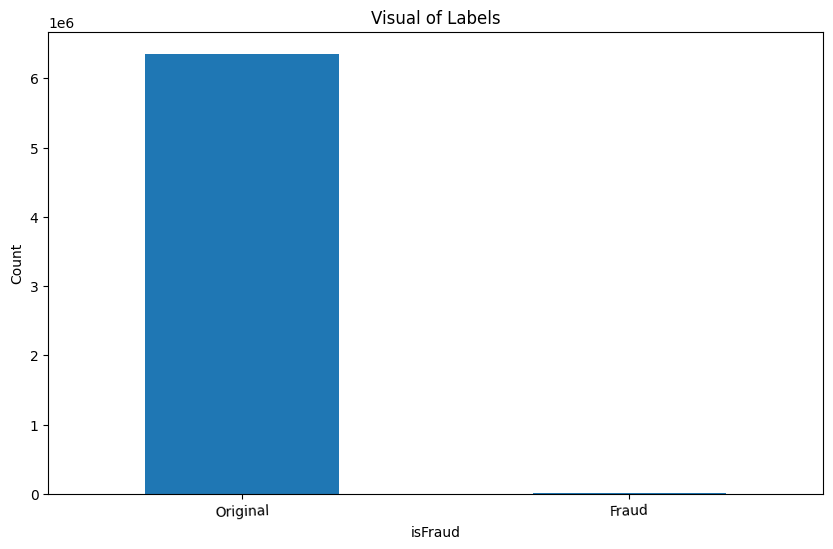

In [8]:
plt.figure(figsize=(10, 6))
labels = ["Original", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort = True)
count_classes.plot(kind = "bar", rot = 2)
plt.title("Visual of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

###### Creating copy of same data set to perform some alteration on datset for our needs to train and test dataset.

In [9]:
copy_df = df.copy()
copy_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


##### As Our dataset contain various kind of datatype , In analysis method we try to make our objects in same datatype which can be mainly (float and int) easy to accepted by many operations. 

In [10]:
object_col = copy_df.select_dtypes(include = "object").columns
print(object_col)


Index(['type', 'nameOrig', 'nameDest'], dtype='object')


###### Removing object datatype and applying float or int to all. 

label = LabelEncoder()
for i in object_col:
    copy_df[i] = label.fit_transform(copy_df[i].astype(str))
print(f'{copy_df.info()} and {copy_df.head(10)}')    

### Multicolinearity (vif)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
def v_i_f (df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, j) for j in range(df.shape[1])]
    
    return (vif)
v_i_f(copy_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


Here we can see the too high difference between the olbalanceorg and newbalanceorg in their VIF. At other object we can compare which shows high difference. 

By combinning these pair of attributes , we can see:

In [34]:
# copy_df['Actual_amount_orig'] = copy_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
# copy_df['Actual_amount_dest'] = copy_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDes'],axis=1)
# copy_df['TransactionPath'] = copy_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)


# copy_df = copy_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

# v_i_f(copy_df)

### Model Building 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Normalizing the Amount factor: 

In [15]:
scaler= StandardScaler()
copy_df["NormalisedAmount"] = scaler.fit_transform(copy_df["amount"].values.reshape(-1,1))
copy_df.drop(["amount"], inplace= True, axis= 1)
P = copy_df["isFraud"]
J = copy_df.drop(["isFraud"], axis = 1)

#### Train-Test Split of data: 

In [16]:
(X_train, X_test, y_train, y_test) = train_test_split(J, P, test_size=0.3, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test : ", X_test.shape)

Shape of X_train:  (4453834, 10)
Shape of X_test :  (1908786, 10)


### DECISION TREE - (i) Model training

In [17]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test) * 100

In [18]:
print(f'Decision Tree Score {decision_tree_score}')

Decision Tree Score 99.96673278198813


#### (ii) Evaluation 

In [19]:
print("TP,FP,TN,FN - Decision Tree")
tp,fp,tn,fn = confusion_matrix(y_test, y_pred_dt).ravel()
print(f'True Positive : {tp}')
print(f'False Positive : {fp}')
print(f'True Negative : {tn} ')
print(f'Flase Negative : {fn}')

TP,FP,TN,FN - Decision Tree
True Positive : 1906048
False Positive : 303
True Negative : 332 
Flase Negative : 2103


#### (iii) Confusion Matrix 

In [20]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(f'{confusion_matrix_dt}')

Confusion Matrix - Decision Tree
[[1906048     303]
 [    332    2103]]


#### (iv) Classification Report 

In [21]:
classification_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report - Decision Tree")
print(f'{classification_report_dt}')

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.87      0.86      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



#### (v) Visualization of Confusion Matrix  

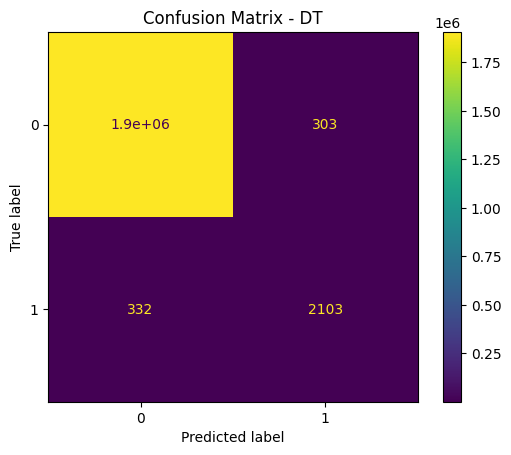

In [22]:
visual_dt = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
visual_dt.plot()
plt.title('Confusion Matrix - DT')
plt.show()

#### (vi) AUC Visualization

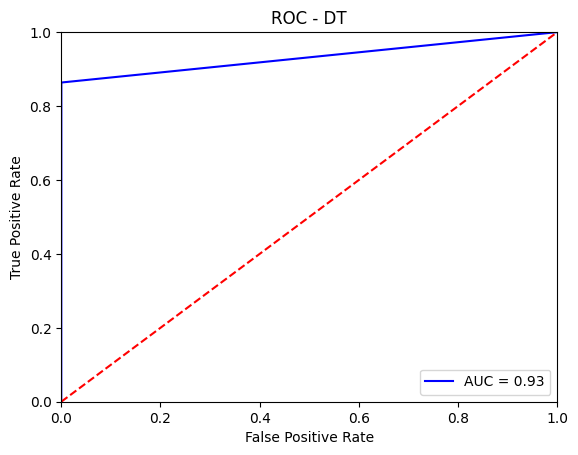

In [23]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
roc_auc = metrics.auc(fpr,tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### DECISION TREE - (i) Model training 

In [24]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, y_test) * 100

In [25]:
print(f'Random Forest Score {random_forest_score}')

Random Forest Score 99.96867118681718


#### (ii) Evaluation  

In [26]:
print("TP, FP, TN, FN - Random Forest")
tp,fp,tn,fn = confusion_matrix(y_test, y_pred_rf).ravel()
print(f'True Postive : {tp}')
print(f'True Negative: {tn}')
print(f'False Positive : {fp}')
print(f'False Negative : {fn}')

TP, FP, TN, FN - Random Forest
True Postive : 1906308
True Negative: 555
False Positive : 43
False Negative : 1880


#### (iii) Confusion Matrix  

In [27]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(f'{confusion_matrix_rf}')

Confusion Matrix - Random Forest
[[1906308      43]
 [    555    1880]]


####  (iv) Classification Report 

In [28]:
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report - Random Forest")
print(f'{classification_report_rf}')

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.77      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



#### (v) Visualization of Confusion Matrix 

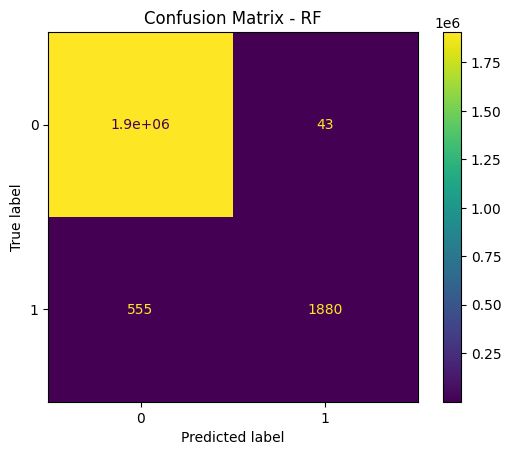

In [29]:
visual_rf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)
visual_rf.plot()
plt.title('Confusion Matrix - RF')
plt.show()

#### (vi) AUC Visualization 

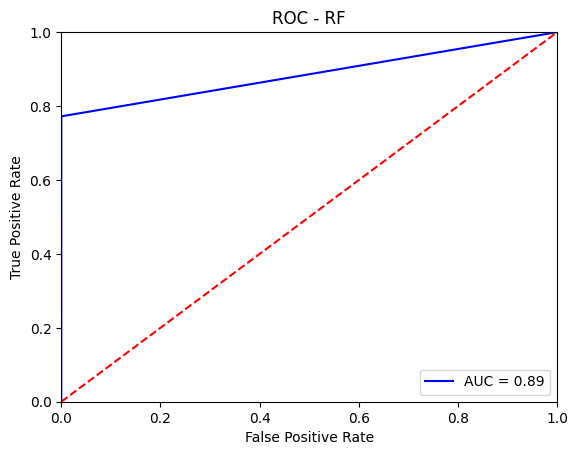

In [30]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr,tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Conclusion 

In our analysis, we observed that the Accuracy of both the Random Forest and Decision Tree models is equal. However, we found that the Precision of the Random Forest model is higher. Precision is of utmost importance in fraud detection because our primary goal is to correctly identify fraudulent transactions while minimizing false positives on legitimate transactions. Failing to achieve either of these objectives could lead to either wrongfully accusing innocent individuals or allowing fraudulent activities to go undetected.

This critical consideration is one of the primary reasons why both Random Forest and Decision Tree models are preferred over other algorithms for fraud detection. The emphasis on Precision ensures a higher degree of confidence in the model's ability to accurately identify fraudulent activities while maintaining a low rate of false positives on legitimate transactions.

Another reason for selecting the Random Forest model is the presence of a highly unbalanced dataset. The data consists of a vast majority of legitimate transactions compared to a small fraction of fraudulent transactions. In such cases, Random Forest, which creates multiple decision trees, is advantageous. Despite the time-consuming process, this ensemble technique allows the model to comprehend the complex data in a more straightforward manner. In contrast, a single Decision Tree may struggle to handle the unbalanced nature of the dataset effectively.

Taking all these factors into account, the Random Forest model emerged as the preferred choice due to its superior Precision and its ability to handle the imbalanced dataset effectively, making it a robust and reliable option for fraud detection scenarios.


    What are the key factors that predict fraudulent customer?
    
The key factors that predict a fraudulent customer can vary depending on the dataset and the specific context of the financial company. However, some common factors that often contribute to predicting fraudulent customers include:

   Transaction Anomalies: Unusual transaction patterns, such as unusually large transactions, frequent transactions, or            transactions from unexpected locations.

   Behavioral Patterns: Suspicious behavior, such as sudden changes in spending habits, multiple failed login attempts, or using    different devices for transactions.

   Geolocation: Transactions originating from high-risk or unexpected geographic locations.

   IP Address: Suspicious IP addresses associated with known fraudulent activities.

   Device Information: Unusual device information, such as a new or unrecognized device used for transactions.

   Account History: Newly opened accounts with little or no transaction history or accounts with sudden and large transactions.

   Identity Verification: Failed identity verification or mismatched personal information.
    
    Do these factors make sense? If yes, How? If not, How not? 
    
These factors do make sense as they are related to common characteristics of fraudulent activities. The identified factors help to detect unusual patterns, behaviors, and activities that deviate from typical legitimate customer behavior. By analyzing these factors, financial companies can build models that are capable of identifying potentially fraudulent customers and transactions, thus bolstering their fraud detection mechanisms.    

    What kind of prevention should be adopted while company update its infrastructure?
    
To prevent fraudulent activities effectively while updating the infrastructure, the financial company can consider implementing the following measures:

   Enhanced Authentication: Adopting multi-factor authentication methods to ensure a higher level of customer identity              verification during transactions.
   
   Real-time Monitoring: Implementing real-time monitoring systems to detect and flag suspicious activities as they happen.
   
   Machine Learning Models: Deploying machine learning models to continuously learn from new data and adapt to evolving fraud      patterns.

   Fraud Alerts: Sending real-time alerts to customers for transactions that might be considered risky or suspicious.
   
   User Behavior Analysis: Analyzing customer behavior to establish patterns and detect any deviations from regular patterns.
   
    Assuming these actions have been implemented, how would you determine if they work?
    
To determine the effectiveness of the implemented preventive measures, the financial company can use various evaluation metrics and techniques:

   Precision and Recall: Assessing precision (ability to correctly identify fraudulent cases) and recall (ability to identify      all actual fraudulent cases) to ensure a good balance between correctly identifying fraud and minimizing false positives.

   ROC Curve and AUC: Analyzing the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score to      evaluate the model's ability to distinguish between fraud and non-fraud cases.

   Confusion Matrix: Examining the confusion matrix to assess the number of true positives, true negatives, false positives, and    false negatives for the model's predictions.

   Time Metrics: Monitoring the model's response time to ensure it can process transactions efficiently in real-time.

By monitoring these metrics and regularly evaluating the model's performance over time, the financial company can gauge the effectiveness of the preventive actions and make necessary adjustments to further improve its fraud prevention system.


In summary, achieving high accuracy does not necessarily guarantee good precision and recall, especially in imbalanced datasets. It is essential to choose appropriate evaluation metrics and employ techniques to address class imbalances to obtain a more reliable and balanced performance in real-world applications.
